# Label validation

Check to make sure our labels making sense

By visualzing the ensemble of temperature curvers corresponding the labeled for locations and time windows.
Using sns.lineplot to plot the ensemble of temperature curves showing the mean and the 95% confidence interval.

confidence interval = sample mean +/- 1.96 * standard error of the mean

where the standard error of the mean is calculated as:

standard error of the mean = standard deviation / sqrt(sample size)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from IPython.display import clear_output
from tqdm import tqdm

from importlib import reload

aclabeler is a package that contains the functions to label the data.
It defines a class called `ACLabeler` that contains the functions to label the data.


In [2]:
import sys
sys.path.insert(0, '../scripts') # for aclabeler.py moved to src/scripts

In [3]:
import aclabeler
reload(aclabeler)

<module 'aclabeler' from '/mnt/c/Users/yshen/OneDrive - San Francisco Bay Area Rapid Transit District/Documents/my_setup/projects/dev/university-projects/ac-monitor/src/scripts/../notebooks/aclabeler.py'>

## data path definitions

In [4]:
data_dir = '../../data/'  # Data directory
temps_file = 'temps/temps_indoor_15T'  # File containing the temperature data in the data_dir
#abnormal_windows_file = 'timewindows_4H_ab_rs2022'  # File containing the possibly abnormal time windows in the data_dir
windows_file = 'timewindows/timewindows_4H_rs2022'  # File containing the definitions of the time windows of data to be labeled

abnormal_labeled_windows_file = 'timewindows/test'
# 'labeledtimewindows_ab_yuan'  # File of the labels in the data_dir to be validated

In [5]:

labeler = aclabeler.ACLabeler(
        path=data_dir,
        # windows=abnormal_windows_file,
        windows=windows_file,
        labeled=abnormal_labeled_windows_file,
        temps=temps_file
    )

## Function to visualize the labelled data

By default in seaborn, it plots the mean of all the values of x and 95% confidence interval around the mean.
It expects two columns of values, one for x and one for y.


In [6]:
def plot_labeled_data(labeler, label_file_name):
    # an inner function: relevant_temperatures_per_record to extract the relevant temperatures for a record
    def relevant_temperatures_per_record(label_record):
        # extract the relevant temperature data, organize the relevant into a dataframe with a column of temperature,
        # and a time (sequence number 0-15), and then concatenate the dataframes for each record into the overall dataframe
        location = label_record['loc']
        start = label_record['start']
        end = label_record['end'] - pd.DateOffset(seconds=0.1) # to exclude the temperature at the end time

        temperature_df = labeler.temperature_df
        # Filter the rows of temperature_df that match the location and have time values within the range
        # sort the values by index (time)
        # remove the index (time) to have a default index of squeential numbers
        mask = (temperature_df['loc'] == location)
        df = temperature_df[mask].loc[start:end] \
            .sort_index() \
            .reset_index(drop=True) \
            .drop(columns=['loc'])

        # Make the index a column called 'time'
        df['time'] = df.index
        return df

    labeler.set_labeled(label_file_name)
    lab = labeler.read_labeled()
    lab_n = lab.query('ab == 0')
    lab_ab = lab.query('ab == 1')

    plt.figure(figsize=(12, 8))
    plt.ylim(85, 95)

    # Plot for normal data and abnormal data respectively
    for label_records, label in [(lab_ab, 'Labeled abnormal'),
                              (lab_n, 'Labeled normal')]:
        # iterate through the rows of the label records,
        # extract the relevant temperature data, organize the relevant into a dataframe with a column of temperature,
        # and a time (sequence number 0-15), and then concatenate the dataframes for each record into the overall dataframe
        # for plotting the ensemble of temperature curves.

        # Concatenate the dataframes in the list to a single dataframe
        df = pd.concat([relevant_temperatures_per_record(label_record) for _, label_record in label_records.iterrows()]
                       #  a list of dataframes, each dataframe is the relevant temperatures for a record
                       )
        sns.lineplot(data=df, x='time', y='temp', label=label)
    plt.legend()
    return plt

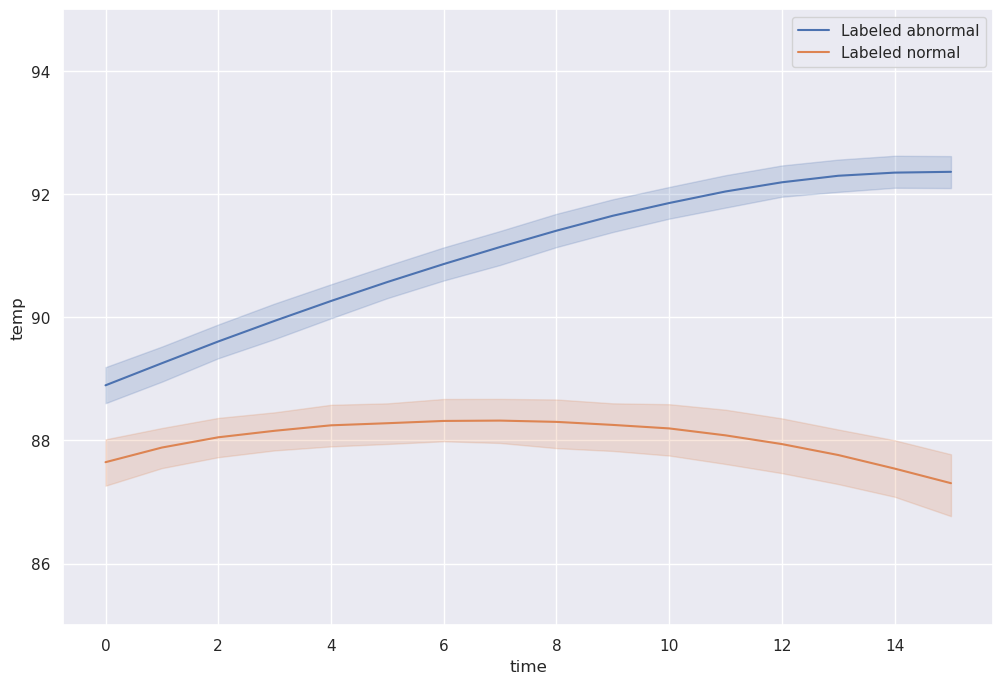

In [7]:
plt = plot_labeled_data(labeler, 'labeledtimewindows/labeledtimewindows_ab_yuan')

In [ ]:
# plt = plot_labeled_data(labeler, 'labeledtimewindows/labeledtimewindows_william')

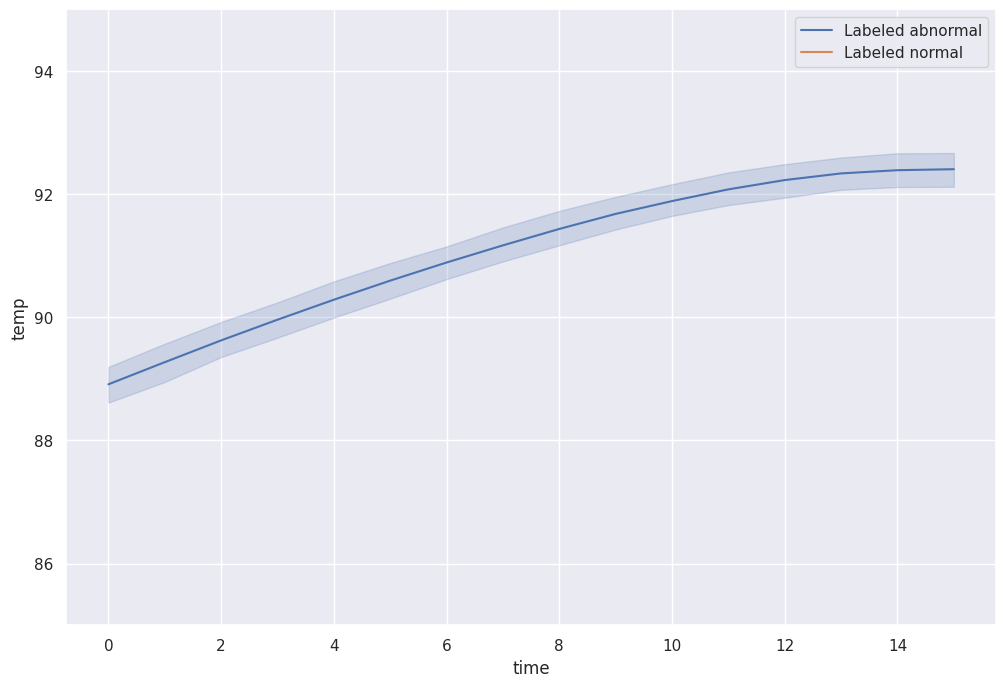

In [17]:
plt = plot_labeled_data(labeler, 'labeledtimewindows/labeledtimewindows_william')

The following commented out code is Steven Yuan's implementation.
It is replaced by Yu Shen's implementation of plot_labeled_data

In [ ]:
# Plot for the labels done by Yuan and William respectively
for label_file_name, savefig_file_name in [('labeledtimewindows/labeledtimewindows_ab_yuan', 'label_val_yuan_ci.png'),
                                        ('labeledtimewindows/labeledtimewindows_william', 'label_val_william_ci.png')]:
    # labeler.set_labeled(label_file_name)
    # lab = labeler.read_labeled()
    # lab_n = lab.query('ab == 0')
    # lab_ab = lab.query('ab == 1')

    # plt.figure(figsize=(12, 8))
    # plt.ylim(85, 95)

    # # Plot for normal data and abnormal data respectively
    # for df, label in [(lab_ab, 'Labeled abnormal'),
    #                (lab_n, 'Labeled normal')]:
    #     df_wide = pd.DataFrame()

    #     for i, row in df.iterrows():
    #         df_wide = pd.concat([
    #             df_wide,
    #             labeler.select_temps(row['loc'], row['start'], row['end'] - pd.DateOffset(seconds=0.1)) \
    #                 .reset_index(drop=True).T
    #         ])

    #     df_plt = df_wide.reset_index(drop=True).melt(var_name='time', value_name='temp')
    #     sns.lineplot(data=df_plt, x='time', y='temp', label=label)

    # plt.legend()
    plt = plot_labeled_data(labeler, label_file_name)
    plt.savefig(data_dir +'images/label_val/' + savefig_file_name, format='png')
    plt.show();

Resolve labeling conflicts

The following code combine the labels from Yuan, William, and Floyd.
I, Yu, have not run the code to verify the correctness of the code.
But it looks straightforward.
They are commented out for now, Wed Jan  4 12:52:41 2023

In [ ]:
# reload(aclabeler)
# labeler = aclabeler.ACLabeler(
#         path=data_dir,
#         windows=windows_file, # abnormal_windows_file,
#         labeled=abnormal_labeled_windows_file,
#         temps=temps_file
#     )

In [ ]:
# abnormal_windows_file, windows_file

In [ ]:
# labeler.set_labeled('labeledtimewindows/labeledtimewindows_ab_yuan')
# lab_yuan = labeler.read_labeled()

# labeler.set_labeled('labeledtimewindows/labeledtimewindows_ab_william')
# lab_william = labeler.read_labeled()

# labeler.set_labeled('labeledtimewindows/labeled_timewindows_conflict_yuanwilliam')
# lab_floyd = labeler.read_labeled()

In [ ]:
# lab_yuanwilliam = pd.merge(lab_yuan, lab_william, how='outer', indicator=True).query('_merge == "both"').drop(columns='_merge')
# lab_yuanwilliam

In [ ]:
# pd.concat([lab_yuanwilliam, lab_floyd]) \
#     .to_csv('../../data/labeledtimewindows_all.zip', index=False, compression=dict(method='zip', archive_name='labeledtimewindows_all.csv'))

In [ ]:
# labeler.set_labeled('labeledtimewindows_all')
# labeler.read_labeled()

In [ ]:
# labeler.read_windows().iloc[lab_yuan.compare(lab_william).index]\
    # .to_csv('../../data/timewindows_conflict_yuanwilliam.zip', index=False, compression=dict(method='zip', archive_name='timewindows_conflict_yuanwilliam.csv'))